# Fetch of MNIST dataset 

In [1]:
from sklearn.datasets import fetch_openml
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
mnist = fetch_openml('mnist_784', version=1)

In [2]:
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]

# Display and examination of the MNIST dataset

In [4]:
X.shape

(70000, 784)

There are 70000 images and each image has 784 features

In [5]:
y.shape

(70000,)

Display top 10 images

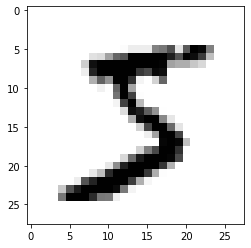

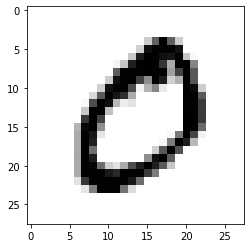

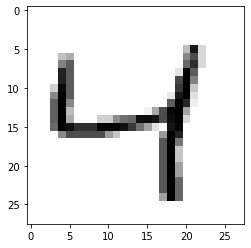

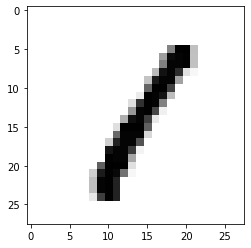

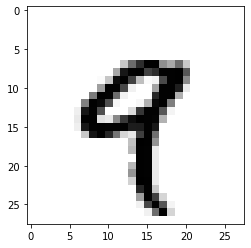

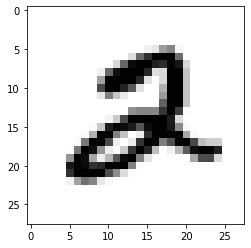

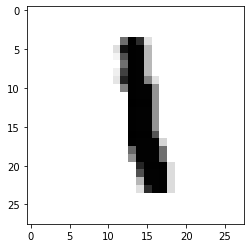

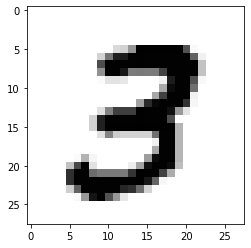

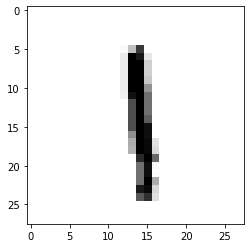

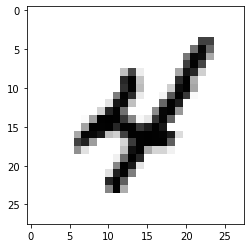

In [6]:
for i in range(0,10):
    some_digit = X[i]
    some_digit_image = some_digit.reshape(28, 28)
    plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
    plt.axis("on")
    plt.show()

In [7]:
y[0]

'5'

In [12]:
y = y.astype(np.uint8)

Preparing training data set

In [13]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [14]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

# Train a Stochastic Gradient Descent (SGD) binary classifier

In [15]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [16]:
some_digit=X[0]
sgd_clf.predict([some_digit])

array([ True])

In [18]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [20]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [21]:
from sklearn.metrics import precision_score, recall_score

# Determine the precision of your SGD classifier using a Confusion matrix

In [22]:
precision_score(y_train_5, y_train_pred)

0.8370879772350012

The precision is 83.7%. It means when we claim an image represents a number 5, it is correct only 83.7 % of the time

In [23]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

The recall score shows that it onlly detects 65.11% of the 5's